In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
DATA_PATH = '/content/drive/MyDrive/colab_2025/COMP4139/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
TARGET_COL = 'Diabetes_binary'
SEED = 42

In [30]:
df = pd.read_csv(DATA_PATH)
display(df.head())
display(df[TARGET_COL].value_counts())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


,count
Diabetes_binary,
0.0,35346
1.0,35346


In [31]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

X_train.shape, X_test.shape

((56553, 21), (14139, 21))

In [32]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=SEED
)

In [33]:
cv = KFold(n_splits=10, shuffle=True, random_state=SEED)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))

Cross-validation scores: [0.64837341 0.65388967 0.65285047 0.6542651  0.66331872 0.66246994
 0.65285047 0.65836752 0.65666997 0.6520017 ]
Mean CV accuracy: 0.6555 ± 0.0045


In [34]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.651

Classification Report
               precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      7070
         1.0       0.66      0.64      0.65      7069

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139


Confusion Matrix
 [[4695 2375]
 [2555 4514]]


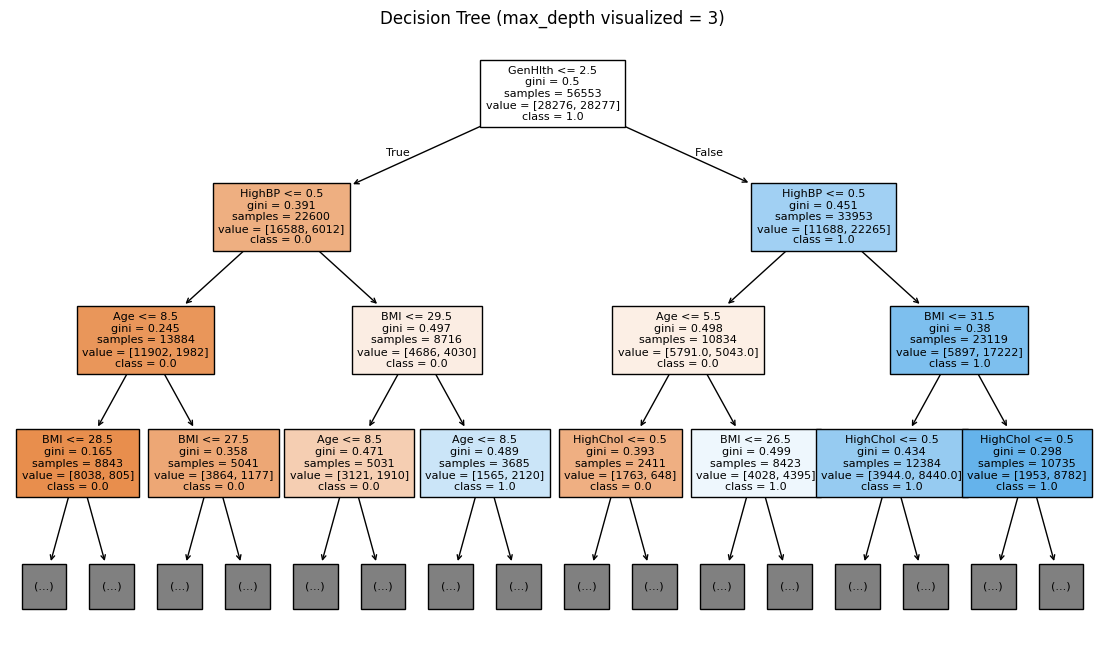

In [35]:
viz_depth = 3
plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    max_depth=viz_depth,
    filled=True,
    fontsize=8
)
plt.title(f"Decision Tree (max_depth visualized = {viz_depth})")
plt.show()